# 2nd Experiment: Adversarial robustness

Notebook for visualizing the results correponding to the 2nd experiment of the Adversarial robustness, between the *BU* (Bottom-Up) baselines and the corresponding *TD* (Top-Down) variants.

First, all the required files are loaded and then plots are generated.

In [1]:
import sys
sys.path.append('./../')

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16

font_ylabel = 16
font_xlabel = 16
font_legend = 15
font_title = 18
font_suptitle = 18
font_marker = 128

In [37]:
# path to files
path = './../output/adversarial/output/'

datasets = ['MNIST', 'Fashion-MNIST', 'CIFAR10', 'CIFAR10_aug']
attacks = ['SinglePixelAttack', 'S&P', 'PointwiseAttack', 'AdditiveGaussianNoiseAttack', 'AdditiveUniformNoiseAttack',
          'BlendedUniformNoiseAttack', 'GaussianBlurAttack', 'ContrastReductionAttack', 'SpatialAttack', 'ShiftsAttack']

labels = {}
perturbed = {}
distances = {}
l2_distances = {}
sorted_distances = {}
adv_acc = {}
SR = {} 
ptb = {}
ptbr = {}
dict_loss = {}
dict_acc = {}

for d in datasets:
    labels[d] = {}
    perturbed[d] = {}
    distances[d] = {}
    l2_distances[d] = {}
    sorted_distances[d] = {}
    adv_acc[d] = {}
    SR[d] = {} 
    ptb[d] = {}
    ptbr[d] = {}
    dict_loss[d] = {}
    dict_acc[d] = {}

# MNIST

In [5]:
(x_train, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis].astype(np.float32)/255.0 
x_test = x_test[..., np.newaxis].astype(np.float32)/255.0
y_test = np.squeeze(y_test)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Loading the files corresponding to the LeNetFC architecture and the MNIST task. You may run the cells corredponding to the networks you are interested in.

The `labels` correspond to the adversarially perturbed labels, the `perturbed` to the extracted adversarial images and the `distances` to the Linf distance between original and perturbed image. In case of an unsuccessful attack `np.inf` distance is returned for that sample and the pertubed image is an `-1*np.ones()`. The `l2_distances` and `sorted_distances` are the L2 distances and the sorted L2 distances respectively, whereas the `adv_acc` offers a mapping from sorted distances to test accuracy. Finally, `SR` is the success ratio of the attack and `ptb`, `ptbr` the introduced perturbation and perturbation ratio repsectively. `dict_loss` and `dict_acc` apply only to the *TD* networks and correspond to the test loss and test accuracy when extracted attacks are reintroduced to a subset of the network's inputs.

In [6]:
model = 'LeNetFC'
npzfile = np.load(f'{path}MNIST/LeNetFC.npz', allow_pickle=True)
labels[datasets[0]][model] = npzfile['arr_0'].item()
perturbed[datasets[0]][model] = npzfile['arr_1'].item()
distances[datasets[0]][model] = npzfile['arr_2'].item()
l2_distances[datasets[0]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[0]][model] = npzfile['arr_4'].item()
adv_acc[datasets[0]][model] = npzfile['arr_5'].item()
SR[datasets[0]][model] = npzfile['arr_6'].item()
ptb[datasets[0]][model] = npzfile['arr_7'].item()
ptbr[datasets[0]][model] = npzfile['arr_8'].item()
dict_loss[datasets[0]][model] = npzfile['arr_9'].item()
dict_acc[datasets[0]][model] = npzfile['arr_10'].item()

Visualizing an attack.

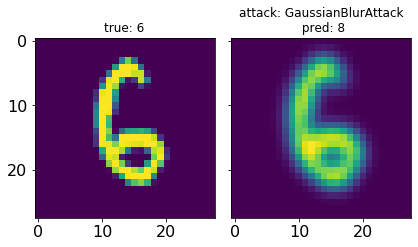

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
ind = int(np.random.rand() * len(x_test))

model = 'LeNetFC'
attack = 'GaussianBlurAttack'

ax[0].imshow(x_test[ind,:,:,0])
ax[0].set_title(f'true: {y_test[ind]}')
ax[1].imshow(perturbed[datasets[0]][model][attack][ind,:,:,0])
ax[1].set_title(f'attack: {attack}\n pred: {labels[datasets[0]][model][attack][ind]}')

fig.tight_layout()

In [9]:
model = 'LeNetFC_TD'
npzfile = np.load(f'{path}MNIST/LeNetFC_TD.npz', allow_pickle=True)
labels[datasets[0]][model] = npzfile['arr_0'].item()
perturbed[datasets[0]][model] = npzfile['arr_1'].item()
distances[datasets[0]][model] = npzfile['arr_2'].item()
l2_distances[datasets[0]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[0]][model] = npzfile['arr_4'].item()
adv_acc[datasets[0]][model] = npzfile['arr_5'].item()
SR[datasets[0]][model] = npzfile['arr_6'].item()
ptb[datasets[0]][model] = npzfile['arr_7'].item()
ptbr[datasets[0]][model] = npzfile['arr_8'].item()
dict_loss[datasets[0]][model] = npzfile['arr_9'].item()
dict_acc[datasets[0]][model] = npzfile['arr_10'].item()

In [11]:
model = 'NIN-light'
npzfile = np.load(f'{path}MNIST/NIN_light.npz', allow_pickle=True)
labels[datasets[0]][model] = npzfile['arr_0'].item()
perturbed[datasets[0]][model] = npzfile['arr_1'].item()
distances[datasets[0]][model] = npzfile['arr_2'].item()
l2_distances[datasets[0]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[0]][model] = npzfile['arr_4'].item()
adv_acc[datasets[0]][model] = npzfile['arr_5'].item()
SR[datasets[0]][model] = npzfile['arr_6'].item()
ptb[datasets[0]][model] = npzfile['arr_7'].item()
ptbr[datasets[0]][model] = npzfile['arr_8'].item()
dict_loss[datasets[0]][model] = npzfile['arr_9'].item()
dict_acc[datasets[0]][model] = npzfile['arr_10'].item()

In [12]:
model = 'NIN-light_TD'
npzfile = np.load(f'{path}MNIST/NIN_light_TD.npz', allow_pickle=True)
labels[datasets[0]][model] = npzfile['arr_0'].item()
perturbed[datasets[0]][model] = npzfile['arr_1'].item()
distances[datasets[0]][model] = npzfile['arr_2'].item()
l2_distances[datasets[0]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[0]][model] = npzfile['arr_4'].item()
adv_acc[datasets[0]][model] = npzfile['arr_5'].item()
SR[datasets[0]][model] = npzfile['arr_6'].item()
ptb[datasets[0]][model] = npzfile['arr_7'].item()
ptbr[datasets[0]][model] = npzfile['arr_8'].item()
dict_loss[datasets[0]][model] = npzfile['arr_9'].item()
dict_acc[datasets[0]][model] = npzfile['arr_10'].item()

Adversarial robusness plots.

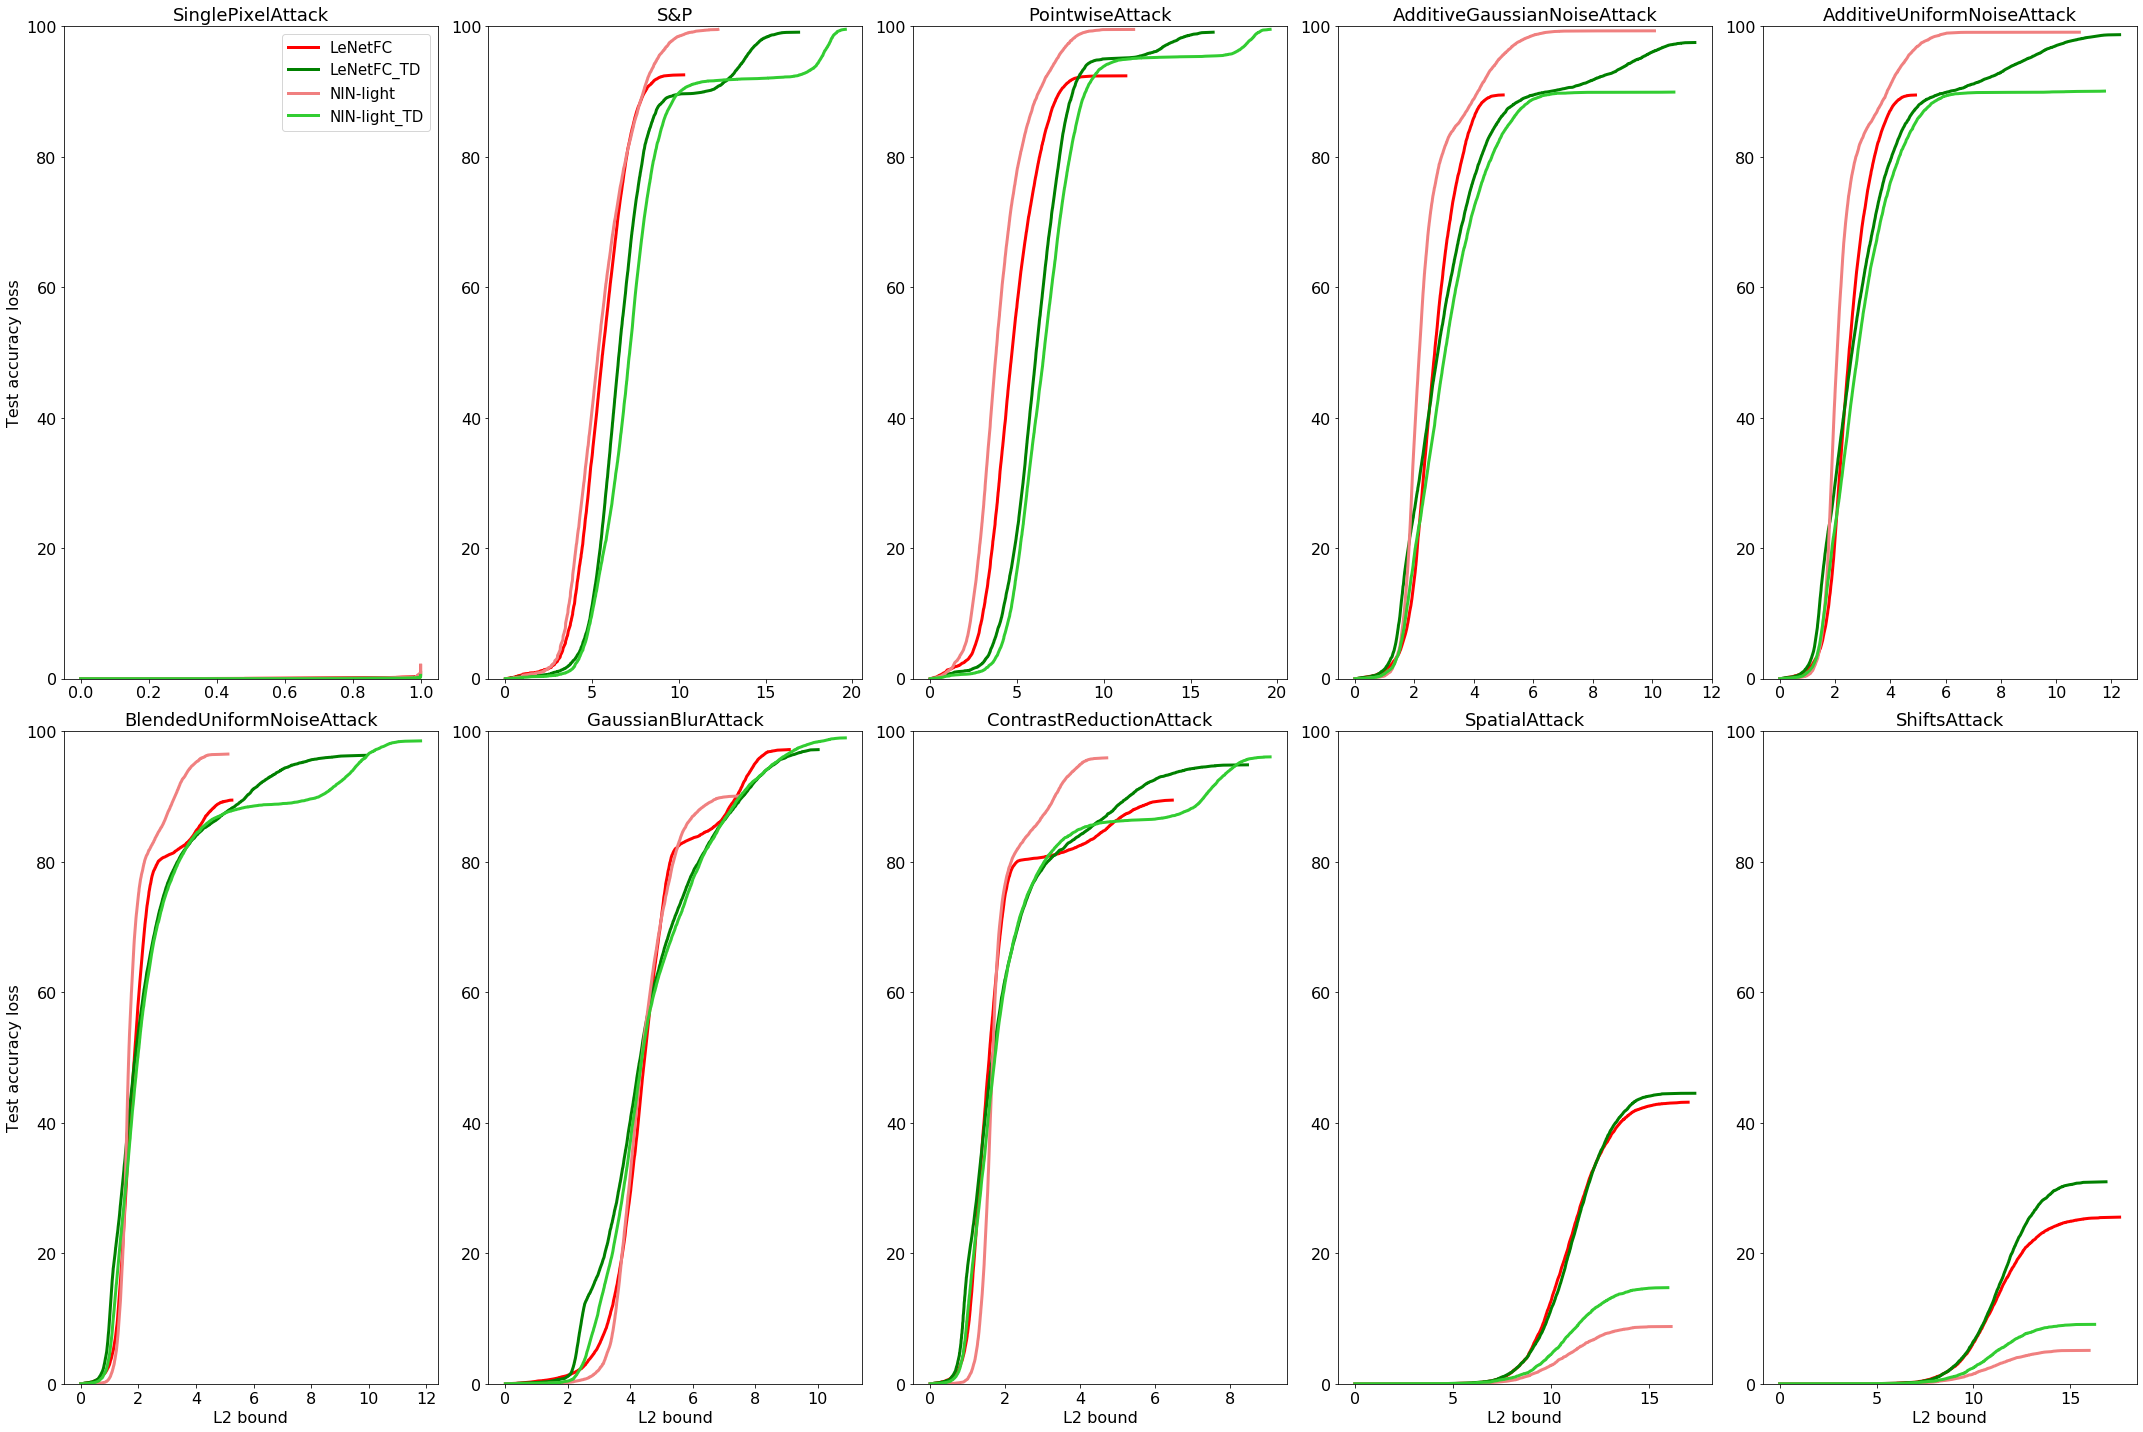

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,20))
color = ['r', 'green', 'lightcoral', 'limegreen']
for i in range(2):
    for j in range(5):
        for k, z in zip(range(len(sorted_distances[datasets[0]].keys())), sorted_distances[datasets[0]].keys()):
            ax[i,j].plot(sorted_distances[datasets[0]][z][attacks[j+5*i]], 
                         100*adv_acc[datasets[0]][z][attacks[j+5*i]][0] - 100*adv_acc[datasets[0]][z][attacks[j+5*i]], 
                         color=color[k], label=z, linewidth=3)        
        
        ax[i,j].set_title(attacks[j+5*i], fontsize=font_title)
        
        
        
        ax[i,j].set_ylim(0,100)
for j in range(5):
    ax[1,j].set_xlabel("L2 bound", fontsize=font_xlabel)
ax[0,0].legend(fontsize=font_legend)
ax[0,0].set_ylabel("Test accuracy loss", fontsize=font_ylabel)
ax[1,0].set_ylabel("Test accuracy loss", fontsize=font_ylabel)

fig.tight_layout()

# Fashion-MNIST

In [14]:
(x_train, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train[..., np.newaxis].astype(np.float32)/255.0 
x_test = x_test[..., np.newaxis].astype(np.float32)/255.0
y_test = np.squeeze(y_test)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [15]:
model = 'LeNetFC'
npzfile = np.load(f'{path}FMNIST/LeNetFC.npz', allow_pickle=True)
labels[datasets[1]][model] = npzfile['arr_0'].item()
perturbed[datasets[1]][model] = npzfile['arr_1'].item()
distances[datasets[1]][model] = npzfile['arr_2'].item()
l2_distances[datasets[1]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[1]][model] = npzfile['arr_4'].item()
adv_acc[datasets[1]][model] = npzfile['arr_5'].item()
SR[datasets[1]][model] = npzfile['arr_6'].item()
ptb[datasets[1]][model] = npzfile['arr_7'].item()
ptbr[datasets[1]][model] = npzfile['arr_8'].item()
dict_loss[datasets[1]][model] = npzfile['arr_9'].item()
dict_acc[datasets[1]][model] = npzfile['arr_10'].item()

In [16]:
model = 'LeNetFC_TD'
npzfile = np.load(f'{path}FMNIST/LeNetFC_TD.npz', allow_pickle=True)
labels[datasets[1]][model] = npzfile['arr_0'].item()
perturbed[datasets[1]][model] = npzfile['arr_1'].item()
distances[datasets[1]][model] = npzfile['arr_2'].item()
l2_distances[datasets[1]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[1]][model] = npzfile['arr_4'].item()
adv_acc[datasets[1]][model] = npzfile['arr_5'].item()
SR[datasets[1]][model] = npzfile['arr_6'].item()
ptb[datasets[1]][model] = npzfile['arr_7'].item()
ptbr[datasets[1]][model] = npzfile['arr_8'].item()
dict_loss[datasets[1]][model] = npzfile['arr_9'].item()
dict_acc[datasets[1]][model] = npzfile['arr_10'].item()

In [17]:
model = 'NIN-light'
npzfile = np.load(f'{path}FMNIST/NIN_light.npz', allow_pickle=True)
labels[datasets[1]][model] = npzfile['arr_0'].item()
perturbed[datasets[1]][model] = npzfile['arr_1'].item()
distances[datasets[1]][model] = npzfile['arr_2'].item()
l2_distances[datasets[1]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[1]][model] = npzfile['arr_4'].item()
adv_acc[datasets[1]][model] = npzfile['arr_5'].item()
SR[datasets[1]][model] = npzfile['arr_6'].item()
ptb[datasets[1]][model] = npzfile['arr_7'].item()
ptbr[datasets[1]][model] = npzfile['arr_8'].item()
dict_loss[datasets[1]][model] = npzfile['arr_9'].item()
dict_acc[datasets[1]][model] = npzfile['arr_10'].item()

In [18]:
model = 'NIN-light_TD'
npzfile = np.load(f'{path}FMNIST/NIN_light_TD.npz', allow_pickle=True)
labels[datasets[1]][model] = npzfile['arr_0'].item()
perturbed[datasets[1]][model] = npzfile['arr_1'].item()
distances[datasets[1]][model] = npzfile['arr_2'].item()
l2_distances[datasets[1]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[1]][model] = npzfile['arr_4'].item()
adv_acc[datasets[1]][model] = npzfile['arr_5'].item()
SR[datasets[1]][model] = npzfile['arr_6'].item()
ptb[datasets[1]][model] = npzfile['arr_7'].item()
ptbr[datasets[1]][model] = npzfile['arr_8'].item()
dict_loss[datasets[1]][model] = npzfile['arr_9'].item()
dict_acc[datasets[1]][model] = npzfile['arr_10'].item()

Adversarial robusness plots.

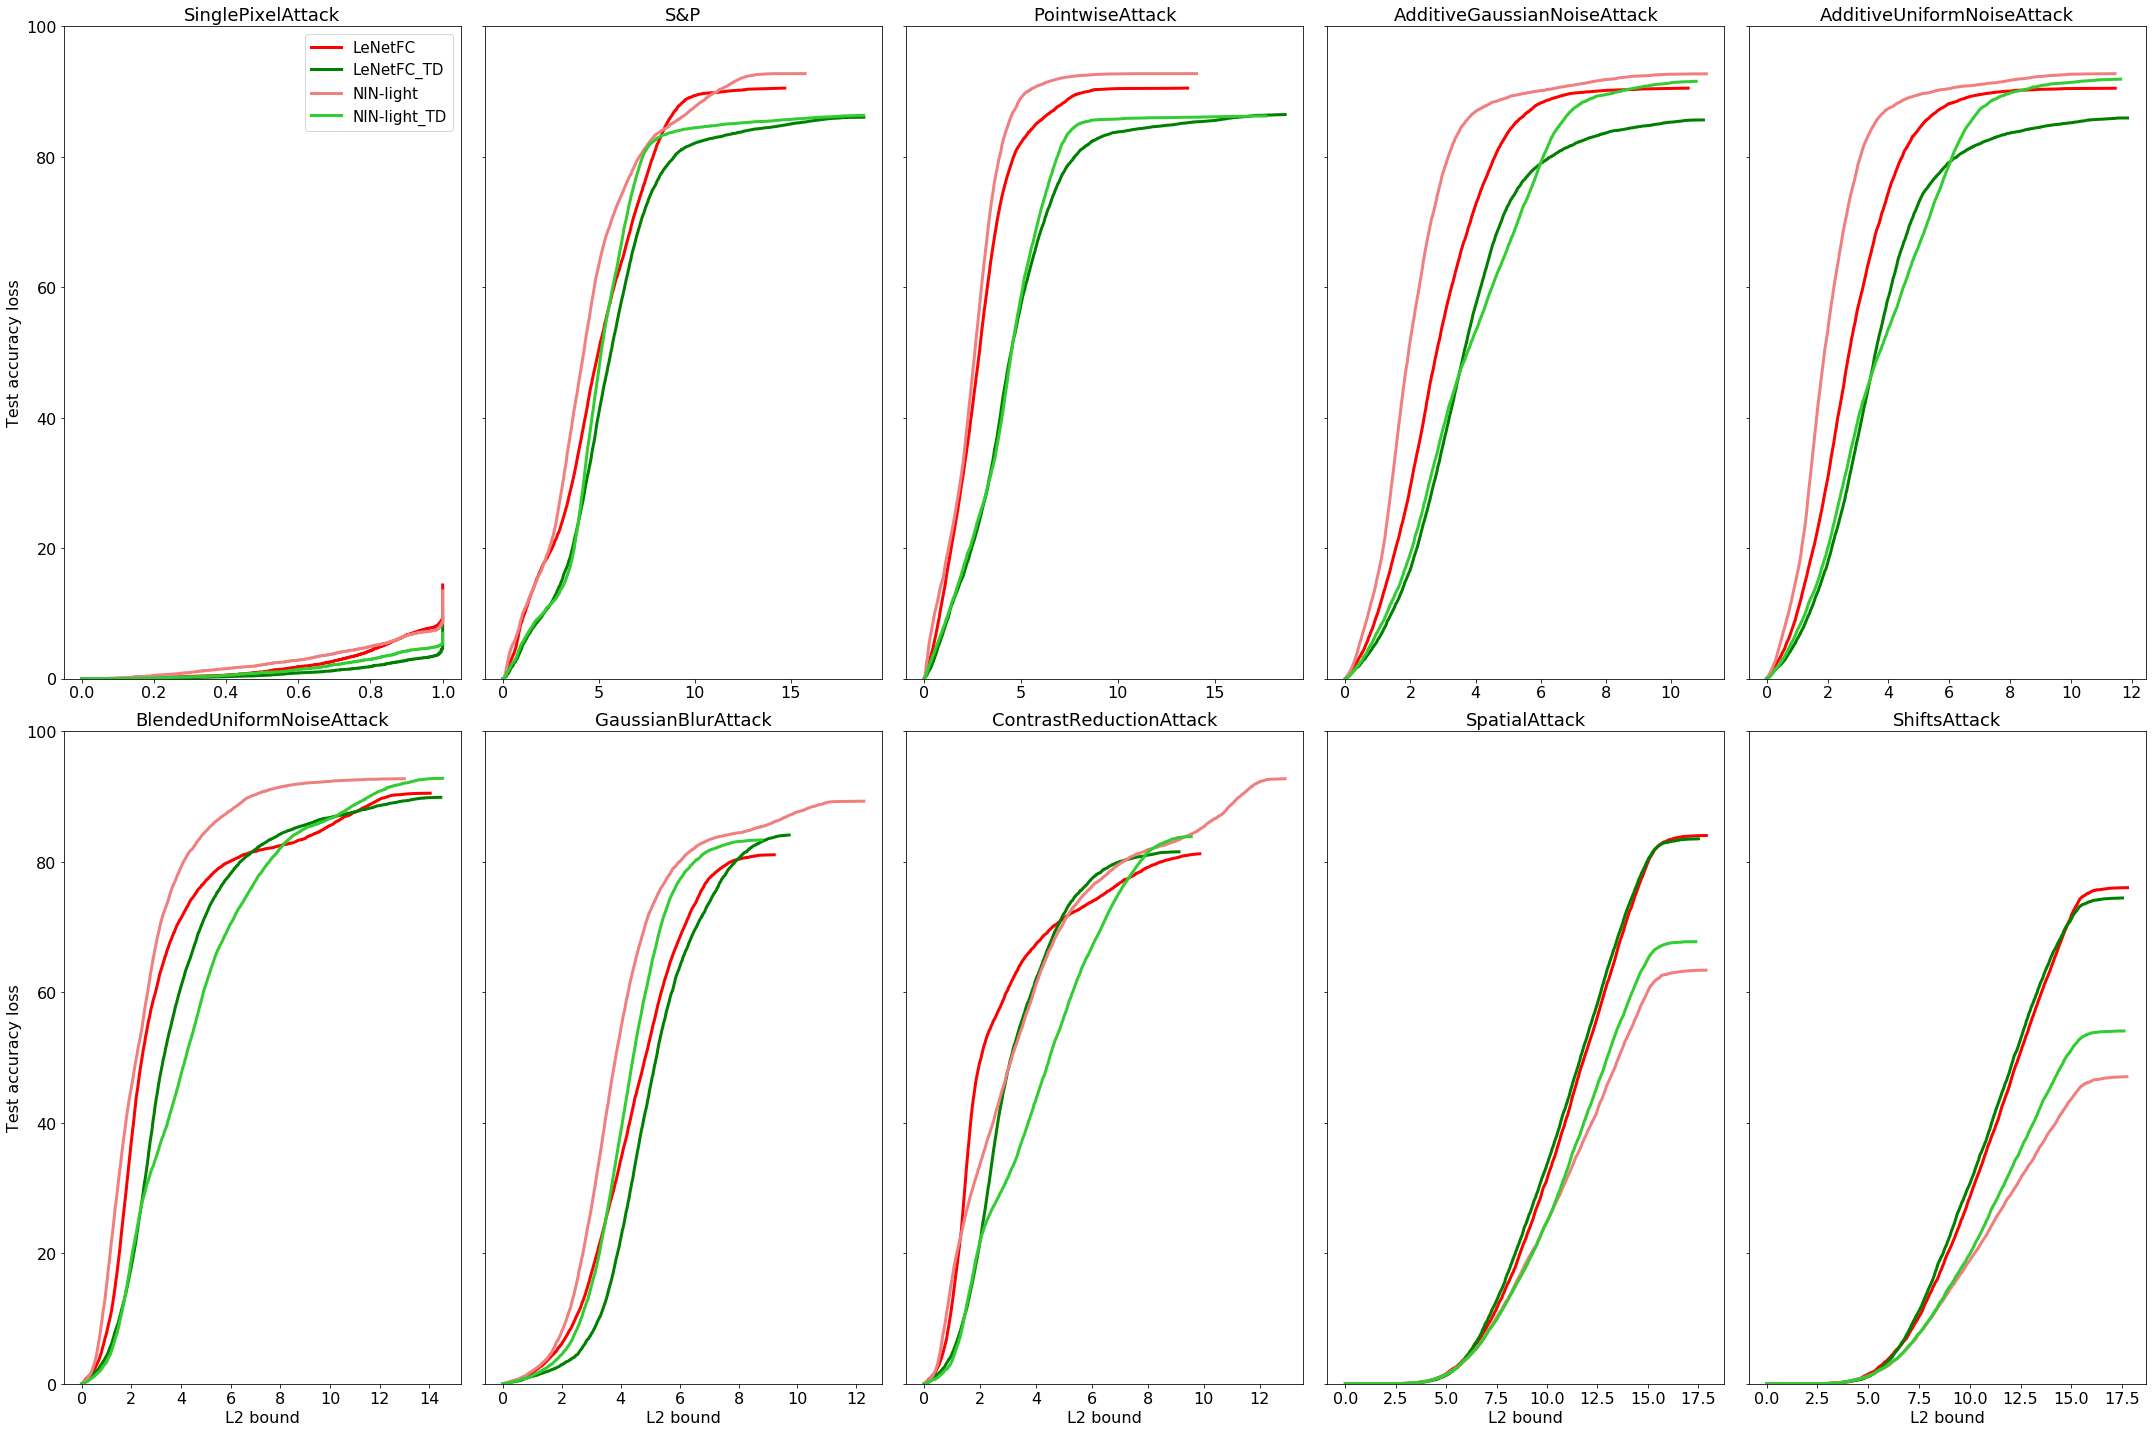

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,20), sharey=True)
color = ['r', 'green', 'lightcoral', 'limegreen']
for i in range(2):
    for j in range(5):
        for k, z in zip(range(len(sorted_distances[datasets[1]].keys())), sorted_distances[datasets[1]].keys()):
            ax[i,j].plot(sorted_distances[datasets[1]][z][attacks[j+5*i]], 
                         100*adv_acc[datasets[1]][z][attacks[j+5*i]][0] - 100*adv_acc[datasets[1]][z][attacks[j+5*i]], 
                         color=color[k], label=z, linewidth=3)
        
        
        ax[i,j].set_title(attacks[j+5*i], fontsize=font_title)
        
        
        
        ax[i,j].set_ylim(0,100)
for j in range(5):
    ax[1,j].set_xlabel("L2 bound", fontsize=font_xlabel)
ax[0,0].legend(fontsize=font_legend)
ax[0,0].set_ylabel("Test accuracy loss", fontsize=font_ylabel)
ax[1,0].set_ylabel("Test accuracy loss", fontsize=font_ylabel)

fig.tight_layout()

# CIFAR10

In [20]:
(x_train, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0 
x_test = x_test.astype(np.float32)/255.0
y_test = np.squeeze(y_test)

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [21]:
model = 'ResNet32'
npzfile = np.load(f'{path}CIFAR10/ResNet.npz', allow_pickle=True)
labels[datasets[2]][model] = npzfile['arr_0'].item()
perturbed[datasets[2]][model] = npzfile['arr_1'].item()
distances[datasets[2]][model] = npzfile['arr_2'].item()
l2_distances[datasets[2]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[2]][model] = npzfile['arr_4'].item()
adv_acc[datasets[2]][model] = npzfile['arr_5'].item()
SR[datasets[2]][model] = npzfile['arr_6'].item()
ptb[datasets[2]][model] = npzfile['arr_7'].item()
ptbr[datasets[2]][model] = npzfile['arr_8'].item()
dict_loss[datasets[2]][model] = npzfile['arr_9'].item()
dict_acc[datasets[2]][model] = npzfile['arr_10'].item()

In [22]:
model = 'ResNet32_TD'
npzfile = np.load(f'{path}CIFAR10/ResNet_TD.npz', allow_pickle=True)
labels[datasets[2]][model] = npzfile['arr_0'].item()
perturbed[datasets[2]][model] = npzfile['arr_1'].item()
distances[datasets[2]][model] = npzfile['arr_2'].item()
l2_distances[datasets[2]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[2]][model] = npzfile['arr_4'].item()
adv_acc[datasets[2]][model] = npzfile['arr_5'].item()
SR[datasets[2]][model] = npzfile['arr_6'].item()
ptb[datasets[2]][model] = npzfile['arr_7'].item()
ptbr[datasets[2]][model] = npzfile['arr_8'].item()
dict_loss[datasets[2]][model] = npzfile['arr_9'].item()
dict_acc[datasets[2]][model] = npzfile['arr_10'].item()

In [ ]:
model = 'ResNet32_TD_uni'
npzfile = np.load(f'{path}CIFAR10/ResNet_TD_uni.npz', allow_pickle=True)
labels[datasets[2]][model] = npzfile['arr_0'].item()
perturbed[datasets[2]][model] = npzfile['arr_1'].item()
distances[datasets[2]][model] = npzfile['arr_2'].item()
l2_distances[datasets[2]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[2]][model] = npzfile['arr_4'].item()
adv_acc[datasets[2]][model] = npzfile['arr_5'].item()
SR[datasets[2]][model] = npzfile['arr_6'].item()
ptb[datasets[2]][model] = npzfile['arr_7'].item()
ptbr[datasets[2]][model] = npzfile['arr_8'].item()
dict_loss[datasets[2]][model] = npzfile['arr_9'].item()
dict_acc[datasets[2]][model] = npzfile['arr_10'].item()

In [ ]:
model = 'ResNet32_TD_rev'
npzfile = np.load(f'{path}CIFAR10/ResNet_TD_rot.npz', allow_pickle=True)
labels[datasets[2]][model] = npzfile['arr_0'].item()
perturbed[datasets[2]][model] = npzfile['arr_1'].item()
distances[datasets[2]][model] = npzfile['arr_2'].item()
l2_distances[datasets[2]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[2]][model] = npzfile['arr_4'].item()
adv_acc[datasets[2]][model] = npzfile['arr_5'].item()
SR[datasets[2]][model] = npzfile['arr_6'].item()
ptb[datasets[2]][model] = npzfile['arr_7'].item()
ptbr[datasets[2]][model] = npzfile['arr_8'].item()
dict_loss[datasets[2]][model] = npzfile['arr_9'].item()
dict_acc[datasets[2]][model] = npzfile['arr_10'].item()

In [23]:
model = 'NIN'
npzfile = np.load(f'{path}CIFAR10/NIN.npz', allow_pickle=True)
labels[datasets[2]][model] = npzfile['arr_0'].item()
perturbed[datasets[2]][model] = npzfile['arr_1'].item()
distances[datasets[2]][model] = npzfile['arr_2'].item()
l2_distances[datasets[2]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[2]][model] = npzfile['arr_4'].item()
adv_acc[datasets[2]][model] = npzfile['arr_5'].item()
SR[datasets[2]][model] = npzfile['arr_6'].item()
ptb[datasets[2]][model] = npzfile['arr_7'].item()
ptbr[datasets[2]][model] = npzfile['arr_8'].item()
dict_loss[datasets[2]][model] = npzfile['arr_9'].item()
dict_acc[datasets[2]][model] = npzfile['arr_10'].item()

In [24]:
model = 'NIN_TD'
npzfile = np.load(f'{path}CIFAR10/NIN_TD.npz', allow_pickle=True)
labels[datasets[2]][model] = npzfile['arr_0'].item()
perturbed[datasets[2]][model] = npzfile['arr_1'].item()
distances[datasets[2]][model] = npzfile['arr_2'].item()
l2_distances[datasets[2]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[2]][model] = npzfile['arr_4'].item()
adv_acc[datasets[2]][model] = npzfile['arr_5'].item()
SR[datasets[2]][model] = npzfile['arr_6'].item()
ptb[datasets[2]][model] = npzfile['arr_7'].item()
ptbr[datasets[2]][model] = npzfile['arr_8'].item()
dict_loss[datasets[2]][model] = npzfile['arr_9'].item()
dict_acc[datasets[2]][model] = npzfile['arr_10'].item()

Adversarial robustness plots.

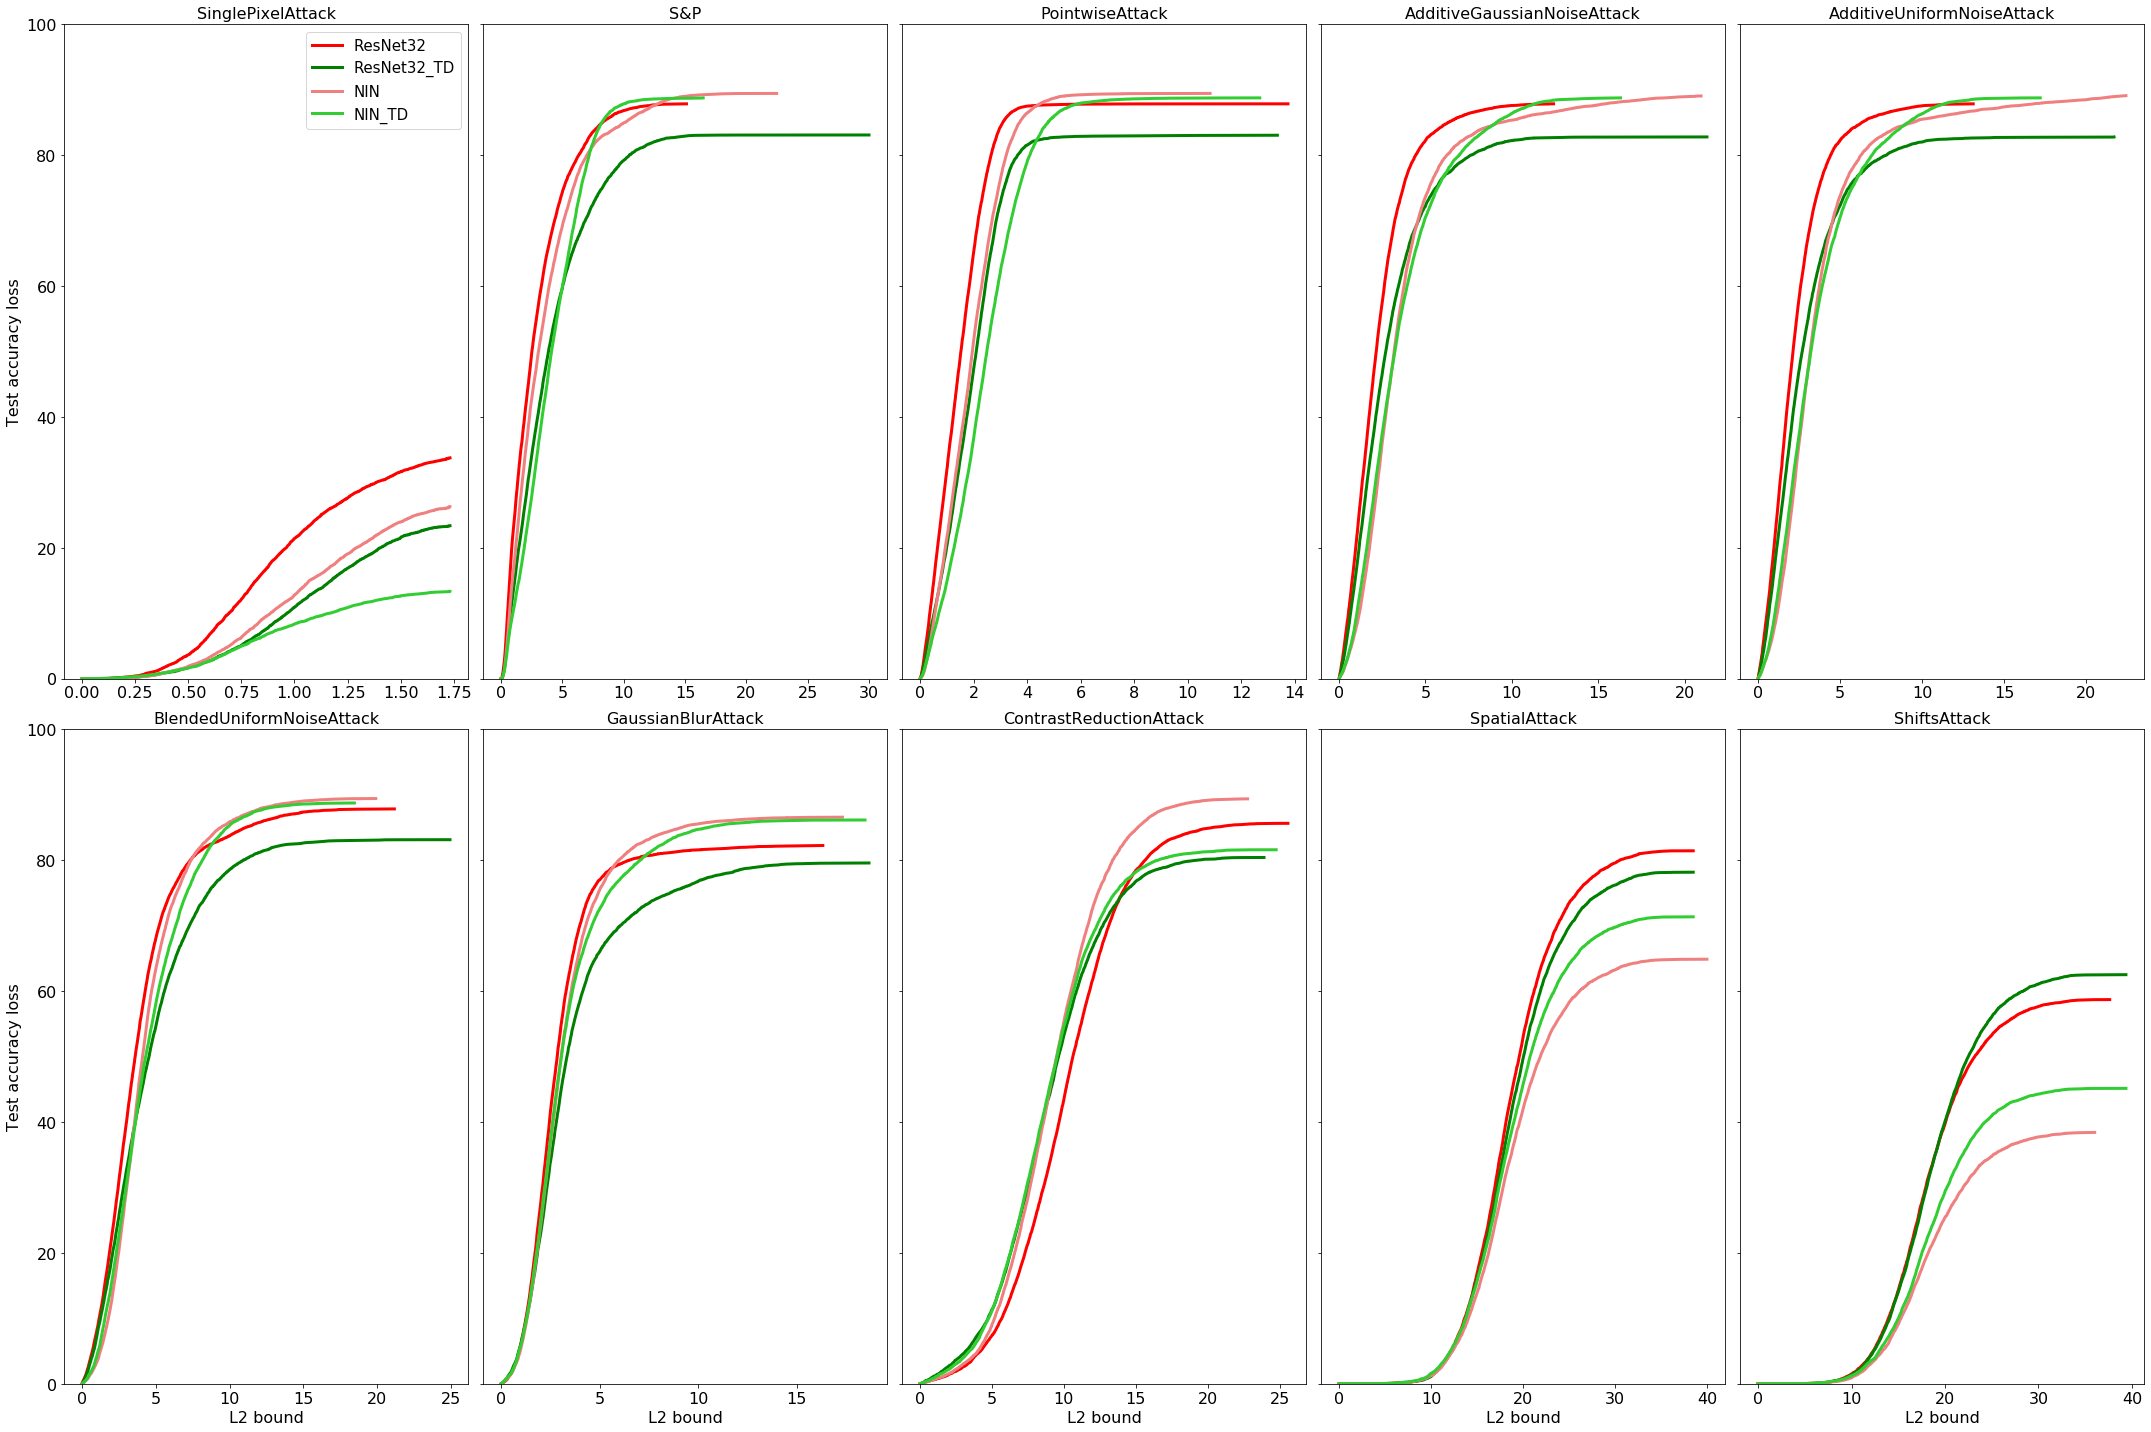

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,20), sharey=True)
color = ['r', 'green', 'lightcoral', 'limegreen']
for i in range(2):
    for j in range(5):
        for k, z in zip(range(len(sorted_distances[datasets[2]].keys())), sorted_distances[datasets[2]].keys()):
            ax[i,j].plot(sorted_distances[datasets[2]][z][attacks[j+5*i]], 
                         100*adv_acc[datasets[2]][z][attacks[j+5*i]][0] - 100*adv_acc[datasets[2]][z][attacks[j+5*i]], 
                         color=color[k], label=z, linewidth=3)
        
        
        ax[i,j].set_title(attacks[j+5*i], fontsize=16)
        
        
        
        ax[i,j].set_ylim(0,100)
for j in range(5):
    ax[1,j].set_xlabel("L2 bound", fontsize=font_xlabel)
ax[0,0].legend(fontsize=font_legend)
ax[0,0].set_ylabel("Test accuracy loss", fontsize=font_ylabel)
ax[1,0].set_ylabel("Test accuracy loss", fontsize=font_ylabel)

fig.tight_layout()

# CIFAR10_aug


In [3]:
(x_train, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0 
x_test = x_test.astype(np.float32)/255.0
y_test = np.squeeze(y_test)

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [27]:
model = 'ResNet32'
npzfile = np.load(f'{path}CIFAR10/ResNet_aug.npz', allow_pickle=True)
labels[datasets[3]][model] = npzfile['arr_0'].item()
perturbed[datasets[3]][model] = npzfile['arr_1'].item()
distances[datasets[3]][model] = npzfile['arr_2'].item()
l2_distances[datasets[3]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[3]][model] = npzfile['arr_4'].item()
adv_acc[datasets[3]][model] = npzfile['arr_5'].item()
SR[datasets[3]][model] = npzfile['arr_6'].item()
ptb[datasets[3]][model] = npzfile['arr_7'].item()
ptbr[datasets[3]][model] = npzfile['arr_8'].item()
dict_loss[datasets[3]][model] = npzfile['arr_9'].item()
dict_acc[datasets[3]][model] = npzfile['arr_10'].item()

In [28]:
model = 'ResNet32_TD'
npzfile = np.load(f'{path}CIFAR10/ResNet_TD_aug.npz', allow_pickle=True)
labels[datasets[3]][model] = npzfile['arr_0'].item()
perturbed[datasets[3]][model] = npzfile['arr_1'].item()
distances[datasets[3]][model] = npzfile['arr_2'].item()
l2_distances[datasets[3]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[3]][model] = npzfile['arr_4'].item()
adv_acc[datasets[3]][model] = npzfile['arr_5'].item()
SR[datasets[3]][model] = npzfile['arr_6'].item()
ptb[datasets[3]][model] = npzfile['arr_7'].item()
ptbr[datasets[3]][model] = npzfile['arr_8'].item()
dict_loss[datasets[3]][model] = npzfile['arr_9'].item()
dict_acc[datasets[3]][model] = npzfile['arr_10'].item()

In [5]:
model = 'ResNet32_TD_uni'
npzfile = np.load(f'{path}CIFAR10/ResNet_TD_uni_aug.npz', allow_pickle=True)
labels[datasets[3]][model] = npzfile['arr_0'].item()
perturbed[datasets[3]][model] = npzfile['arr_1'].item()
distances[datasets[3]][model] = npzfile['arr_2'].item()
l2_distances[datasets[3]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[3]][model] = npzfile['arr_4'].item()
adv_acc[datasets[3]][model] = npzfile['arr_5'].item()
SR[datasets[3]][model] = npzfile['arr_6'].item()
ptb[datasets[3]][model] = npzfile['arr_7'].item()
ptbr[datasets[3]][model] = npzfile['arr_8'].item()
dict_loss[datasets[3]][model] = npzfile['arr_9'].item()
dict_acc[datasets[3]][model] = npzfile['arr_10'].item()

In [6]:
model = 'ResNet32_TD_rev'
npzfile = np.load(f'{path}CIFAR10/ResNet_TD_rot_aug.npz', allow_pickle=True)
labels[datasets[3]][model] = npzfile['arr_0'].item()
perturbed[datasets[3]][model] = npzfile['arr_1'].item()
distances[datasets[3]][model] = npzfile['arr_2'].item()
l2_distances[datasets[3]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[3]][model] = npzfile['arr_4'].item()
adv_acc[datasets[3]][model] = npzfile['arr_5'].item()
SR[datasets[3]][model] = npzfile['arr_6'].item()
ptb[datasets[3]][model] = npzfile['arr_7'].item()
ptbr[datasets[3]][model] = npzfile['arr_8'].item()
dict_loss[datasets[3]][model] = npzfile['arr_9'].item()
dict_acc[datasets[3]][model] = npzfile['arr_10'].item()

In [29]:
model = 'NIN'
npzfile = np.load(f'{path}CIFAR10/NIN_aug.npz', allow_pickle=True)
labels[datasets[3]][model] = npzfile['arr_0'].item()
perturbed[datasets[3]][model] = npzfile['arr_1'].item()
distances[datasets[3]][model] = npzfile['arr_2'].item()
l2_distances[datasets[3]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[3]][model] = npzfile['arr_4'].item()
adv_acc[datasets[3]][model] = npzfile['arr_5'].item()
SR[datasets[3]][model] = npzfile['arr_6'].item()
ptb[datasets[3]][model] = npzfile['arr_7'].item()
ptbr[datasets[3]][model] = npzfile['arr_8'].item()
dict_loss[datasets[3]][model] = npzfile['arr_9'].item()
dict_acc[datasets[3]][model] = npzfile['arr_10'].item()

In [30]:
model = 'NIN_TD'
npzfile = np.load(f'{path}CIFAR10/NIN_TD_aug.npz', allow_pickle=True)
labels[datasets[3]][model] = npzfile['arr_0'].item()
perturbed[datasets[3]][model] = npzfile['arr_1'].item()
distances[datasets[3]][model] = npzfile['arr_2'].item()
l2_distances[datasets[3]][model] = npzfile['arr_3'].item()
sorted_distances[datasets[3]][model] = npzfile['arr_4'].item()
adv_acc[datasets[3]][model] = npzfile['arr_5'].item()
SR[datasets[3]][model] = npzfile['arr_6'].item()
ptb[datasets[3]][model] = npzfile['arr_7'].item()
ptbr[datasets[3]][model] = npzfile['arr_8'].item()
dict_loss[datasets[3]][model] = npzfile['arr_9'].item()
dict_acc[datasets[3]][model] = npzfile['arr_10'].item()

Adversarial robustness plots.

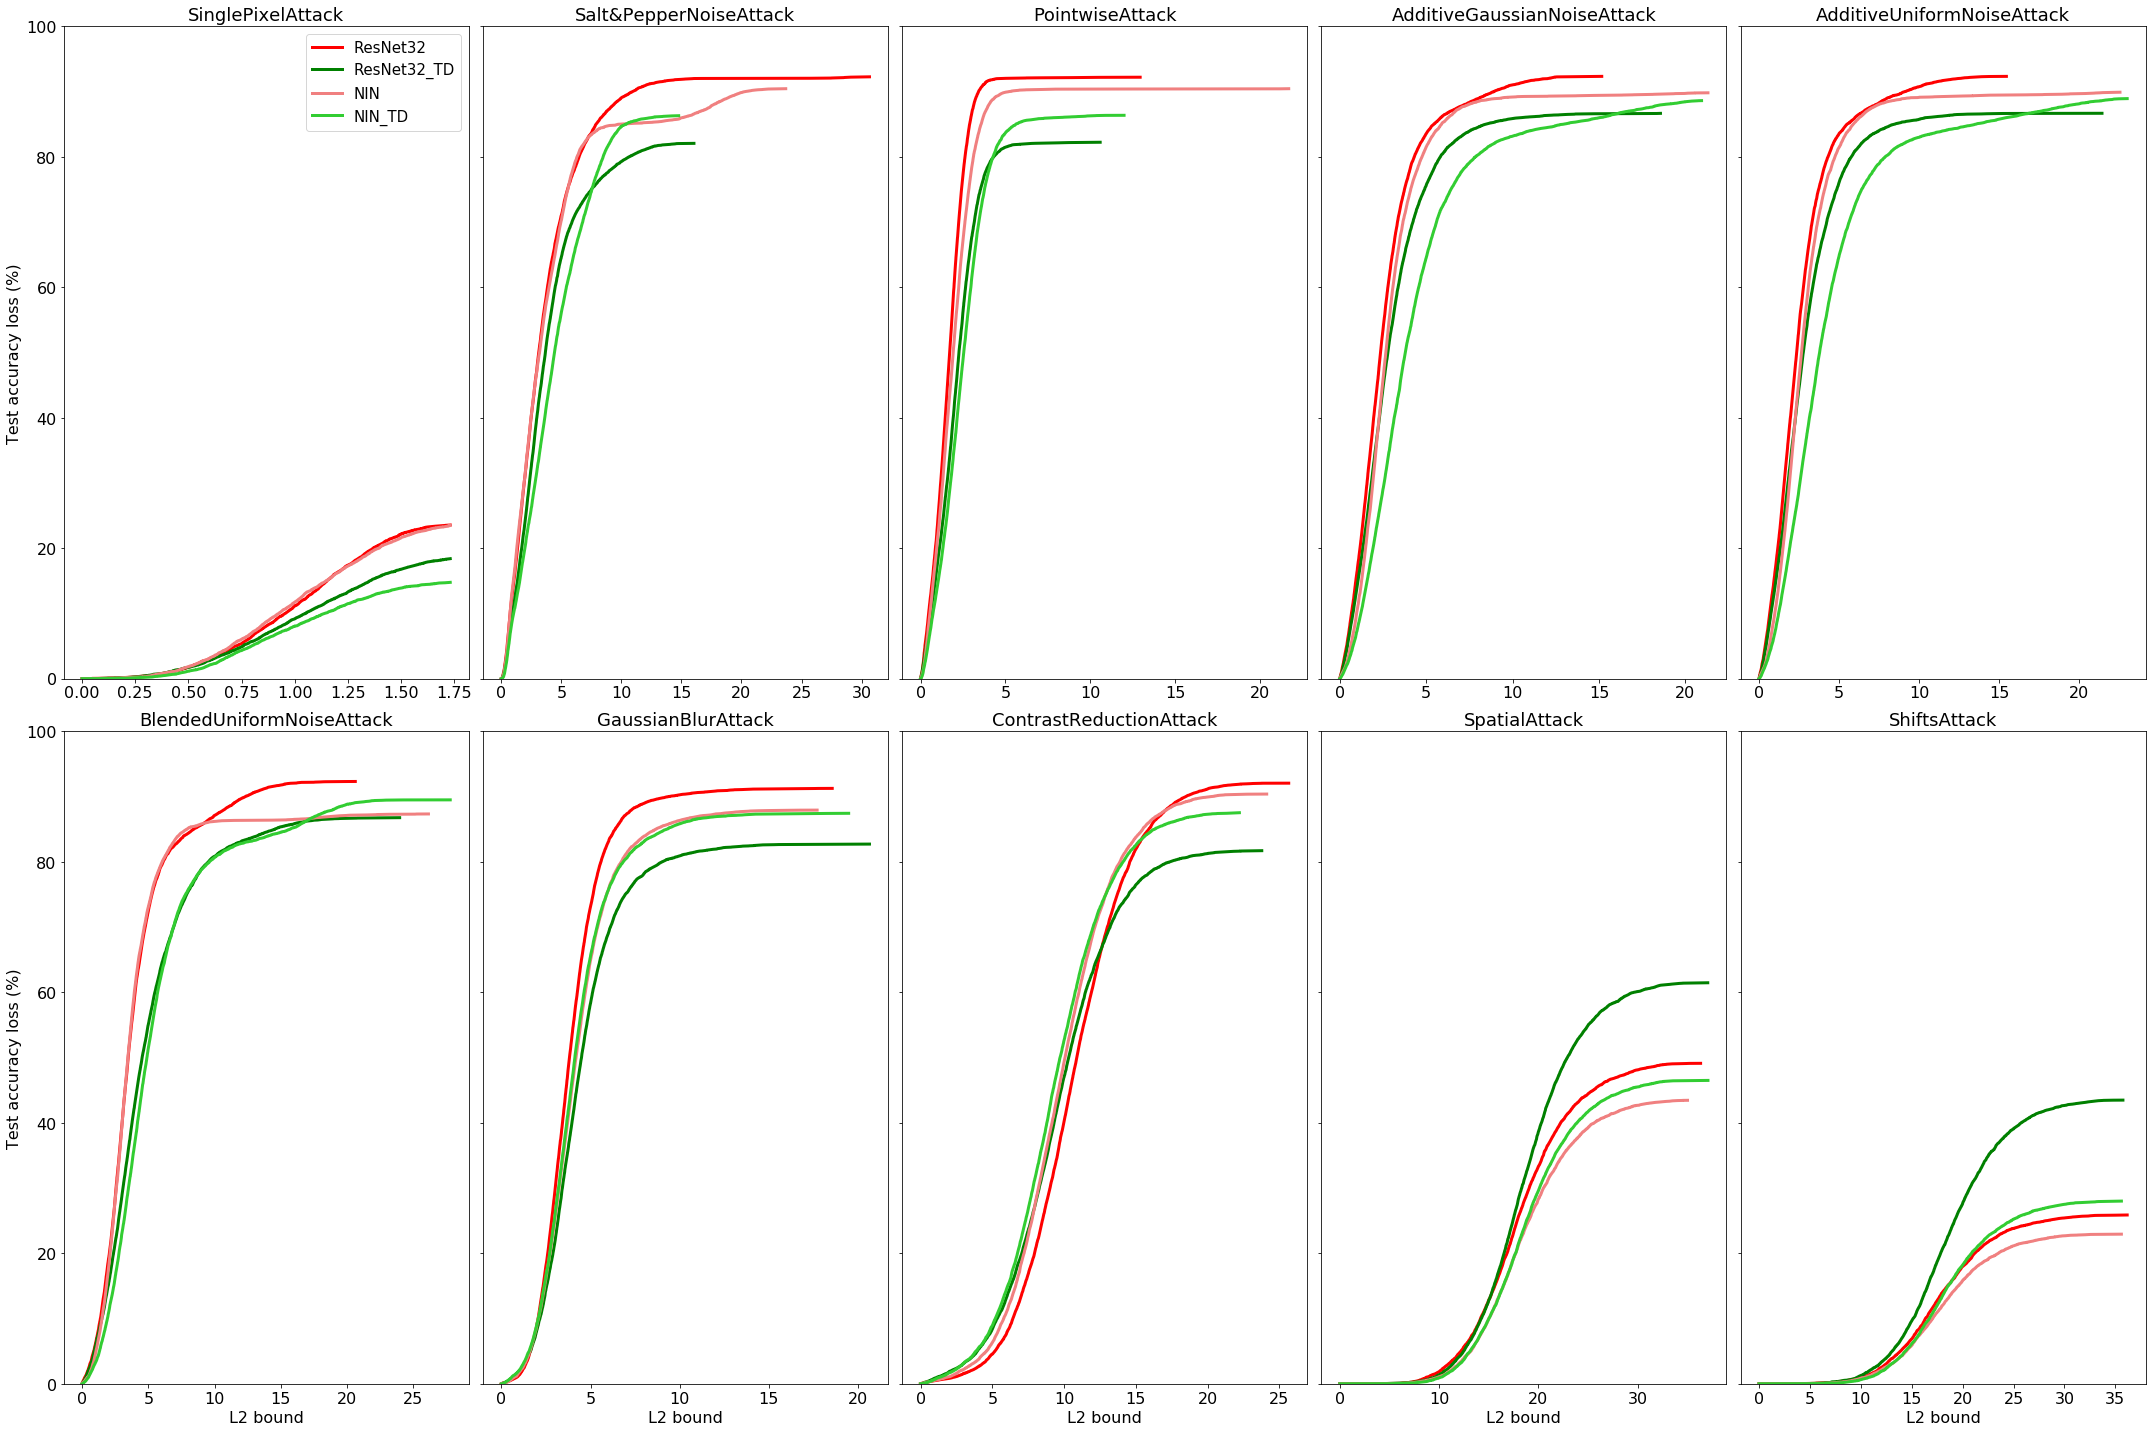

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,20), sharey=True)
color = ['r', 'green', 'lightcoral', 'limegreen']
for i in range(2):
    for j in range(5):
        for k, z in zip(range(len(sorted_distances[datasets[3]].keys())), sorted_distances[datasets[3]].keys()):
            ax[i,j].plot(sorted_distances[datasets[3]][z][attacks[j+5*i]], 
                         100*adv_acc[datasets[3]][z][attacks[j+5*i]][0] - 100*adv_acc[datasets[3]][z][attacks[j+5*i]], 
                         color=color[k], label=z, linewidth=3)
        
        
        if attacks[j+5*i] == 'S&P':
            ax[i,j].set_title('Salt&PepperNoiseAttack', fontsize=font_title)
        else:
            ax[i,j].set_title(attacks[j+5*i], fontsize=font_title)
        
        
        
        ax[i,j].set_ylim(0,100)
for j in range(5):
    ax[1,j].set_xlabel("L2 bound", fontsize=font_xlabel)
ax[0,0].legend(fontsize=font_legend)
ax[0,0].set_ylabel("Test accuracy loss (%)", fontsize=font_ylabel)
ax[1,0].set_ylabel("Test accuracy loss (%)", fontsize=font_ylabel)

fig.tight_layout()

# Plots

Adversarial robustness plots; the x-axis corresponds to the L2 distance between the original and the perturbed image and the y-axis to the introduced loss in the test accuracy. A lower curve suggests increased robustness.

Enhanced robustness is measured for correlated/uncorrelated noise, as well as for blurring attacks; the green curves corresponding to the *TD* networks lie underneath the red *BU* curves.

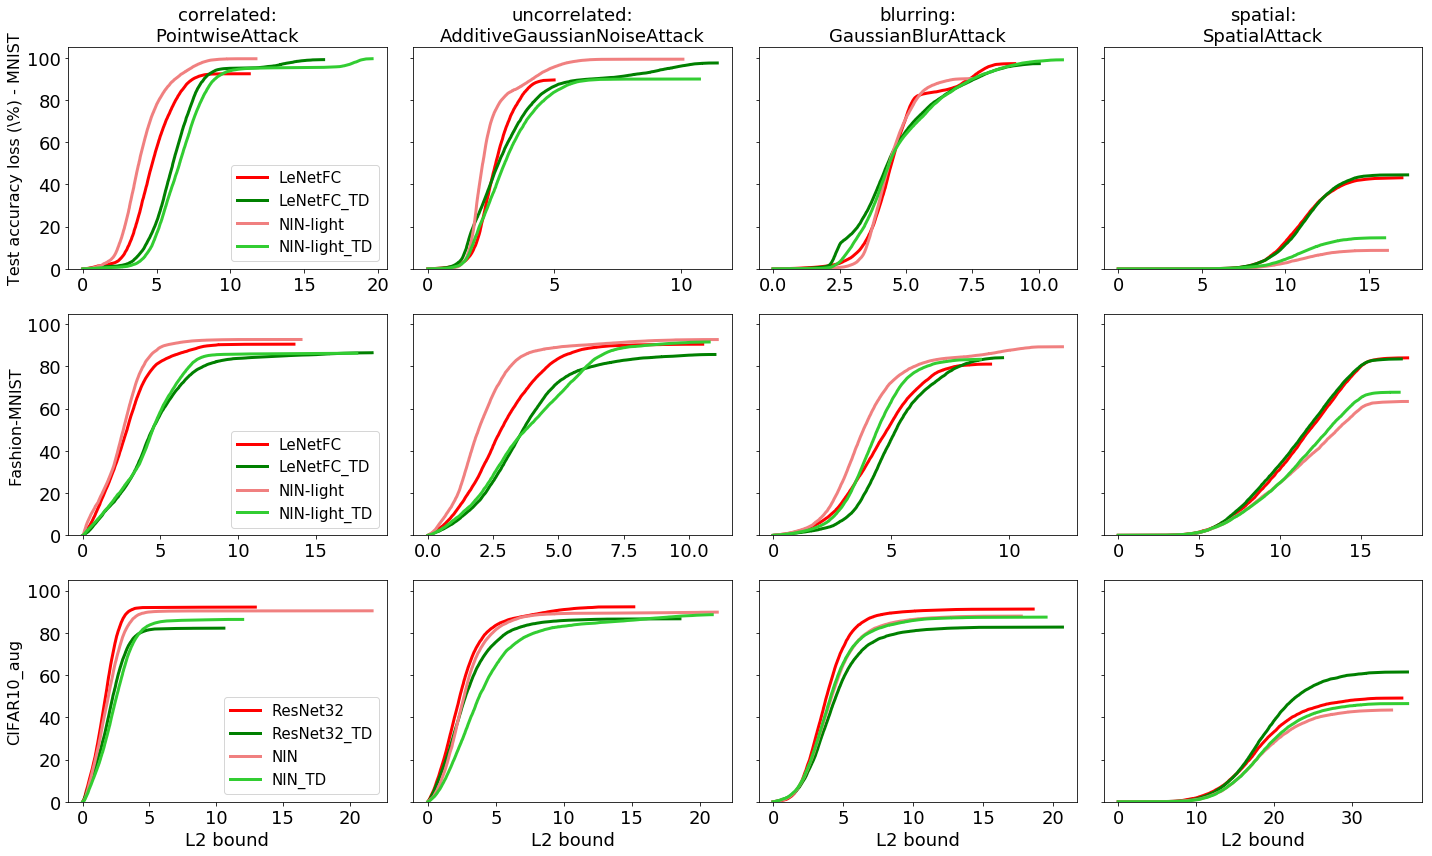

In [30]:
attacks = ['PointwiseAttack', 'AdditiveGaussianNoiseAttack',
          'GaussianBlurAttack', 'SpatialAttack']
datasets = ['MNIST', 'Fashion-MNIST', 'CIFAR10_aug']

fig, ax = plt.subplots(nrows=3, ncols=len(attacks), figsize=(20,12), sharey=True)

color = ['r', 'green', 'lightcoral', 'limegreen']
titles = ['correlated', 'uncorrelated', 'blurring', 'spatial']

for i, attack in zip(range(len(attacks)), attacks):
    for j, dataset in zip(range(len(datasets)), datasets):
        for z, model in zip(range(len(list(adv_acc[dataset].keys()))), list(adv_acc[dataset].keys())):
            ax[j,i].plot(sorted_distances[dataset][model][attack], 
                         100*adv_acc[dataset][model][attack][0] - 100*adv_acc[dataset][model][attack], 
                         color=color[z], linewidth=3,label=model)
            ax[j,i].set_ylim(0, 105)
        if i==0:
            ax[j,i].legend(fontsize=font_legend)
        
    ax[0, i].set_title(f"{titles[i]}:\n{attack}", fontsize=font_title)
        
    
ax[0,0].set_ylabel("Test accuracy loss (\%) - MNIST", fontsize=font_ylabel)
ax[1,0].set_ylabel("Fashion-MNIST", fontsize=font_ylabel)
ax[2,0].set_ylabel("CIFAR10_aug", fontsize=font_ylabel)
for j in range(4):
    ax[-1,j].set_xlabel("L2 bound", fontsize=font_title)
    
fig.tight_layout()

Complete set of results for all the datasets and attacks.

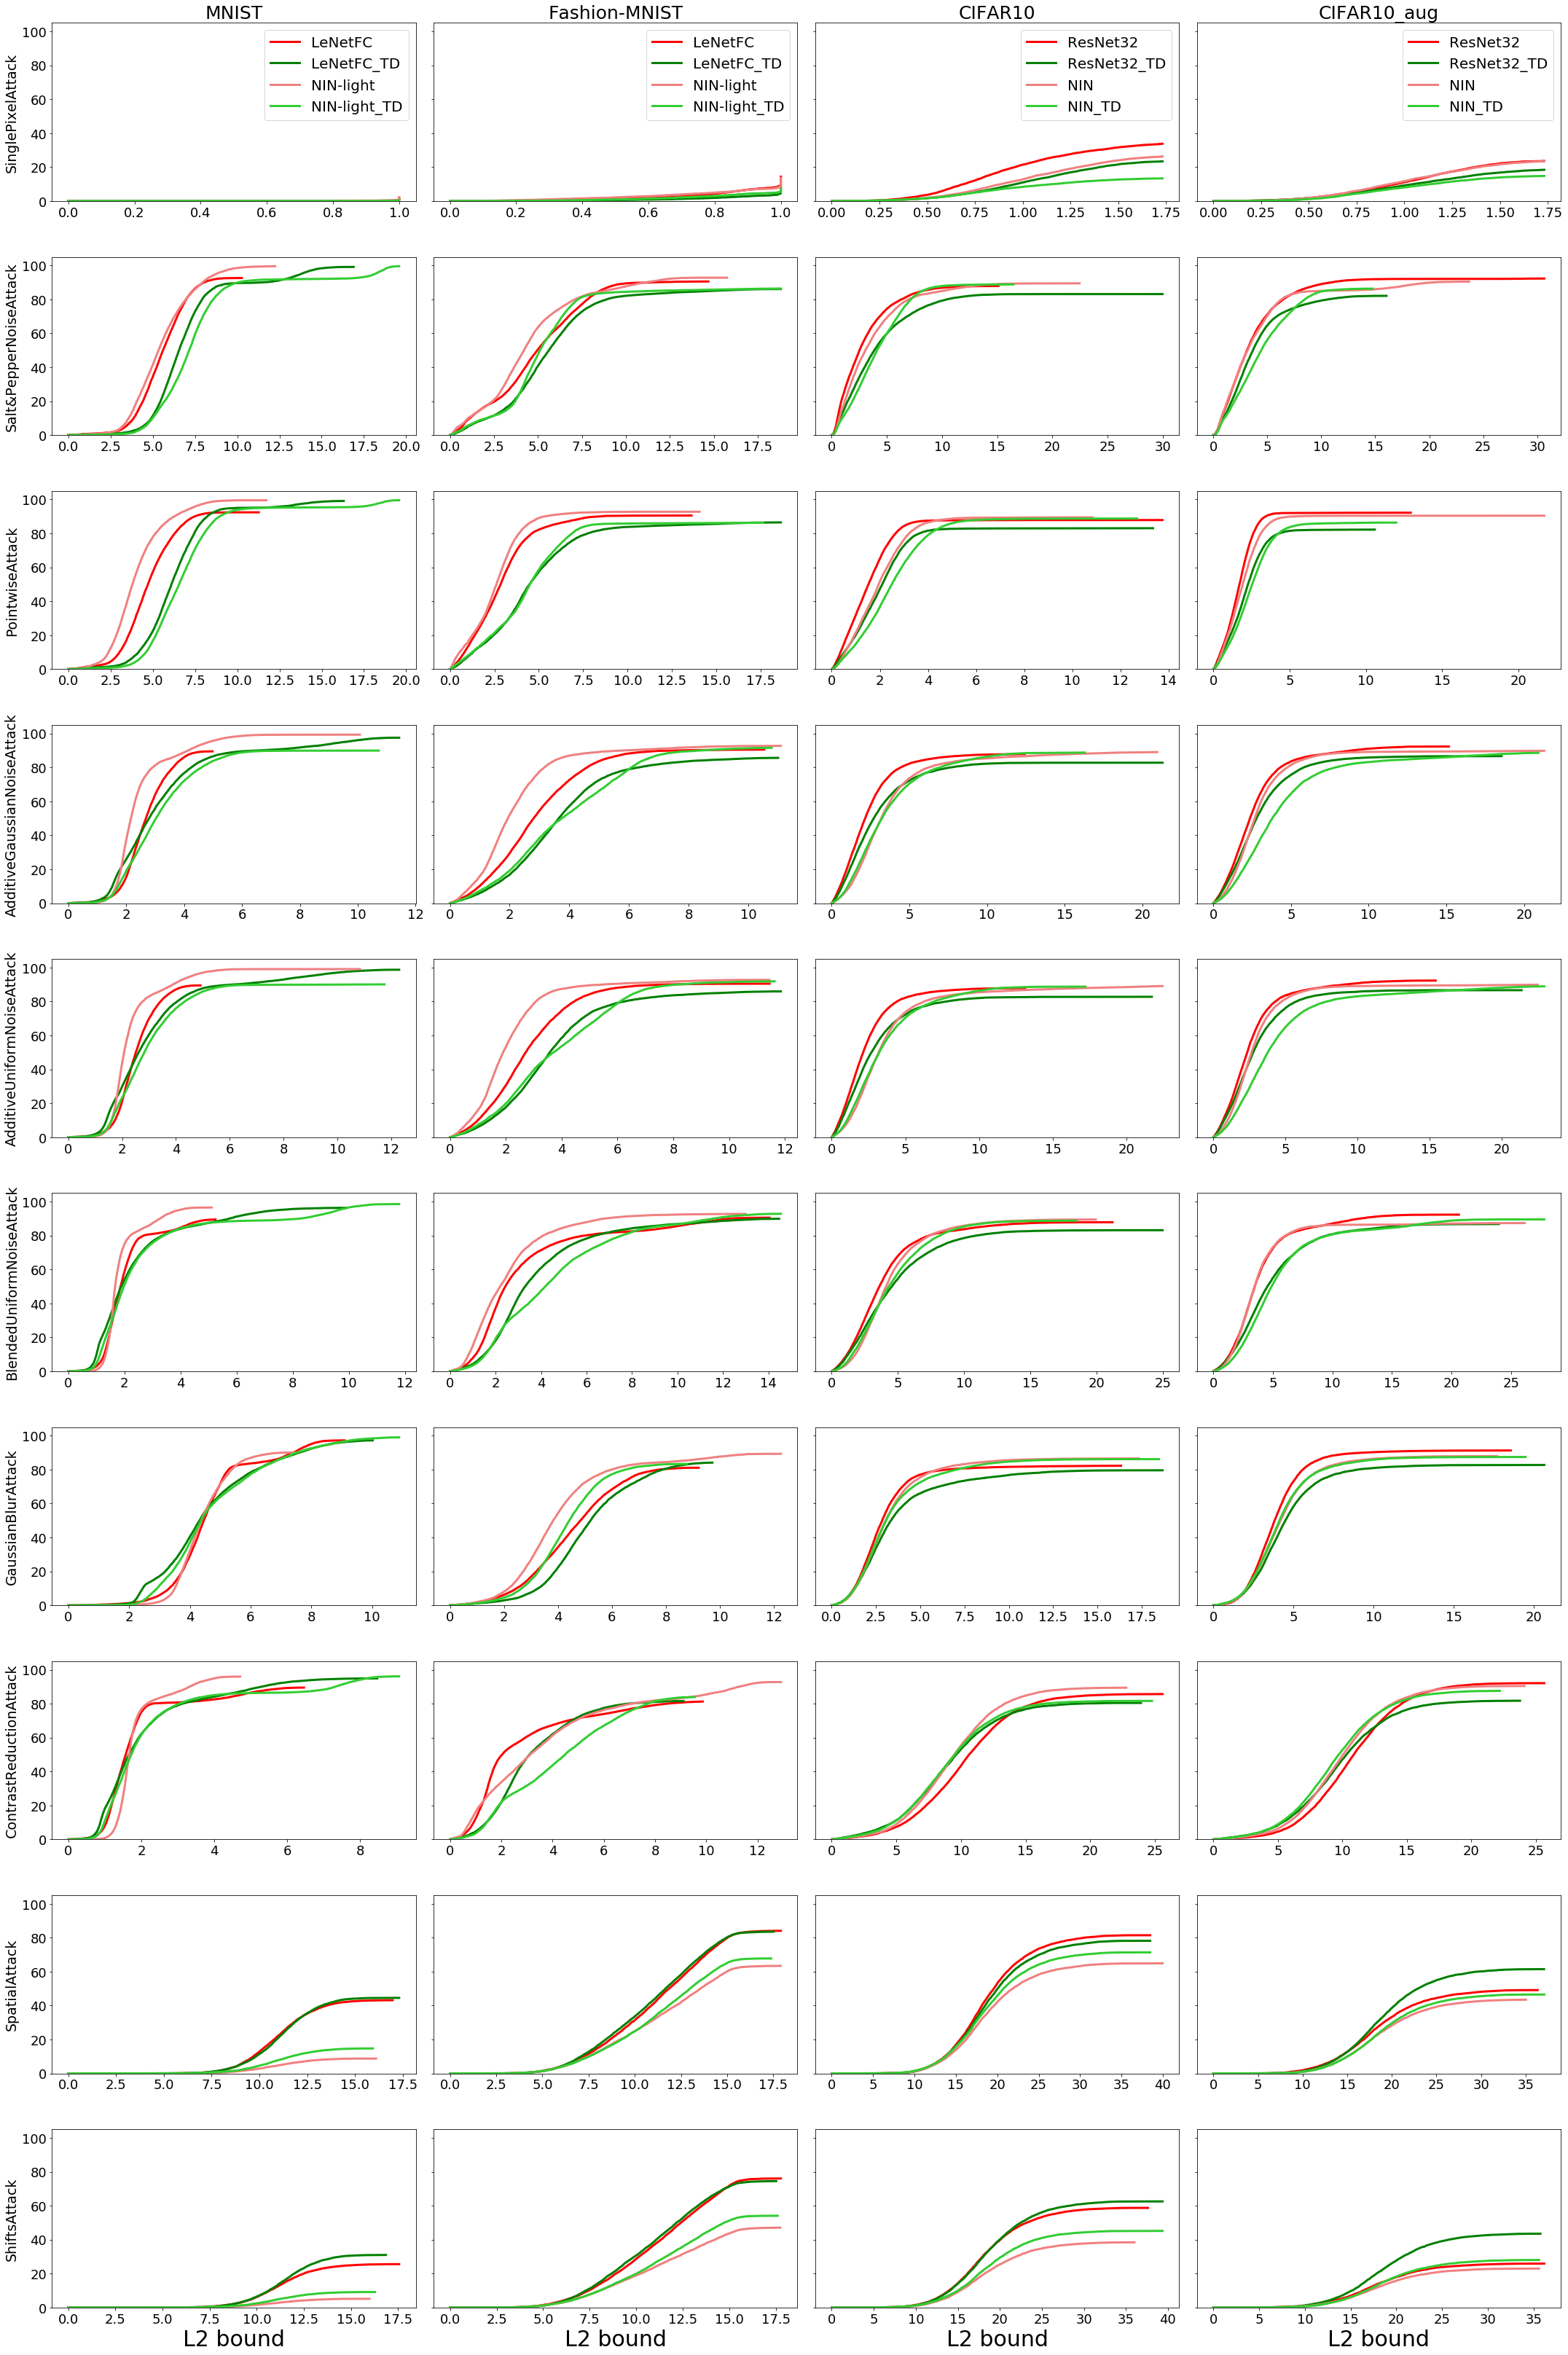

In [31]:
attacks = ['SinglePixelAttack', 'S&P', 'PointwiseAttack', 'AdditiveGaussianNoiseAttack', 'AdditiveUniformNoiseAttack',
          'BlendedUniformNoiseAttack', 'GaussianBlurAttack', 'ContrastReductionAttack', 'SpatialAttack', 'ShiftsAttack']

fig, ax = plt.subplots(nrows=len(attacks), ncols=4, figsize=(30,45), sharey=True)

color = ['r', 'green', 'lightcoral', 'limegreen']

datasets = ['MNIST', 'Fashion-MNIST', 'CIFAR10', 'CIFAR10_aug']
for i, attack in zip(range(len(attacks)), attacks):
    for j, dataset in zip(range(len(datasets)), datasets):
        for z, model in zip(range(len(list(adv_acc[dataset].keys()))), list(adv_acc[dataset].keys())):
            ax[i,j].plot(sorted_distances[dataset][model][attack], 
                         100*adv_acc[dataset][model][attack][0] - 100*adv_acc[dataset][model][attack], 
                         color=color[z], linewidth=3,label=model)
            ax[i,j].set_ylim(0, 105)
    
        if i == len(attacks)-1:
            ax[i,j].set_xlabel("L2 bound", fontsize=30)
            ax[0,j].set_title(dataset, fontsize=25)
            ax[0,j].legend(fontsize=20)
    if attack == 'S&P':
        ax[i,0].set_ylabel('Salt&PepperNoiseAttack', fontsize=19)
    else:
        ax[i,0].set_ylabel(attack, fontsize=19)
        
fig.tight_layout()

Plot for introducing the extracted attacks to a single input of the *TD* network. As backbone architectures we use the NIN-light_TD for the MNIST, Fashion-MNIST tasks and the NIN_TD for the CIFAR10 task. The *"Original"* corresponds to the unpertubed accuracy.

As the task complexity increases, the highest scale input has the biggest impact in accuracy. The absence or scarce information in the high freqeuncy region for the simpler MNIST task yields the *"medium"* input the most vulnerable one.

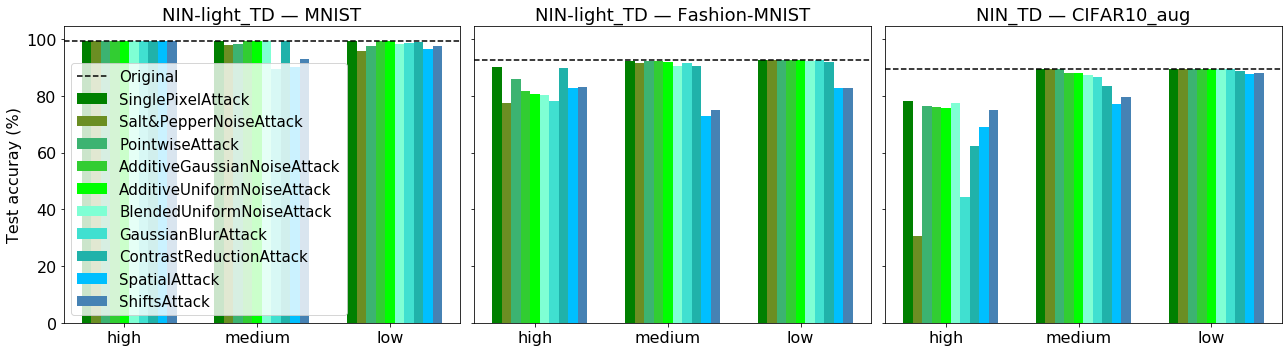

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharex=True, sharey=True)
n = len(attacks)
width = 1
sep = 14*width
xticks = np.arange(n)*sep
color = ['g', 'olivedrab', 'mediumseagreen', 'limegreen', 'lime', 'aquamarine', 'turquoise', 'lightseagreen', 'deepskyblue', 'steelblue']
xticks = np.arange(10)

attacks = ['SinglePixelAttack', 'S&P', 'PointwiseAttack', 'AdditiveGaussianNoiseAttack', 'AdditiveUniformNoiseAttack',
          'BlendedUniformNoiseAttack', 'GaussianBlurAttack', 'ContrastReductionAttack', 'SpatialAttack', 'ShiftsAttack']
datasets = ['MNIST', 'Fashion-MNIST', 'CIFAR10_aug']
models = ['NIN-light_TD', 'NIN-light_TD', 'NIN_TD']
for i, d in zip(range(3), datasets):
    ax[i].axhline(100 * dict_acc[d][models[i]][attacks[0]][0], linestyle='--', color='black', label='Original')
    for j,a in zip(range(len(attacks)), attacks):
        if a == 'S&P':
                ax[i].bar(xticks[j], 100 * dict_acc[d][models[i]][a][2], width=width, color=color[j], label='Salt&PepperNoiseAttack')
        else:
            ax[i].bar(xticks[j], 100 * dict_acc[d][models[i]][a][2], width=width, color=color[j], label=a)
        ax[i].bar(xticks[j] + sep, 100 * dict_acc[d][models[i]][a][3], width=width, color=color[j])
        ax[i].bar(xticks[j] + 2*sep, 100 * dict_acc[d][models[i]][a][4], width=width, color=color[j])
        
        ax[i].set_xticks([4, 18, 32])
        ax[i].set_xticklabels(['high', 'medium', 'low'], fontsize=font_ylabel)
ax[0].set_ylabel("Test accuray (%)", fontsize=font_ylabel)
ax[0].legend(fontsize=font_legend)
ax[0].set_title(f"{models[0]} \u2014 MNIST", fontsize=font_title)
ax[1].set_title(f"{models[1]} \u2014 Fashion-MNIST", fontsize=font_title)
ax[2].set_title(f"{models[2]} \u2014 CIFAR10_aug", fontsize=font_title)

fig.tight_layout()

Similar to the previous plot, only now two of the inputs are fed with the extracted attacks. As backbone architectures we use the NIN-light_TD for the MNIST, Fashion-MNIST tasks and the NIN_TD for the CIFAR10 task. The *"Original"* corresponds to the unpertubed accuracy. 

Clearly the combination of the highest and medium scale input, *"high-medium"* has the highest impact. For the MNIST task *"medium-low"* has the biggest impact for the same reason as mentioned above.

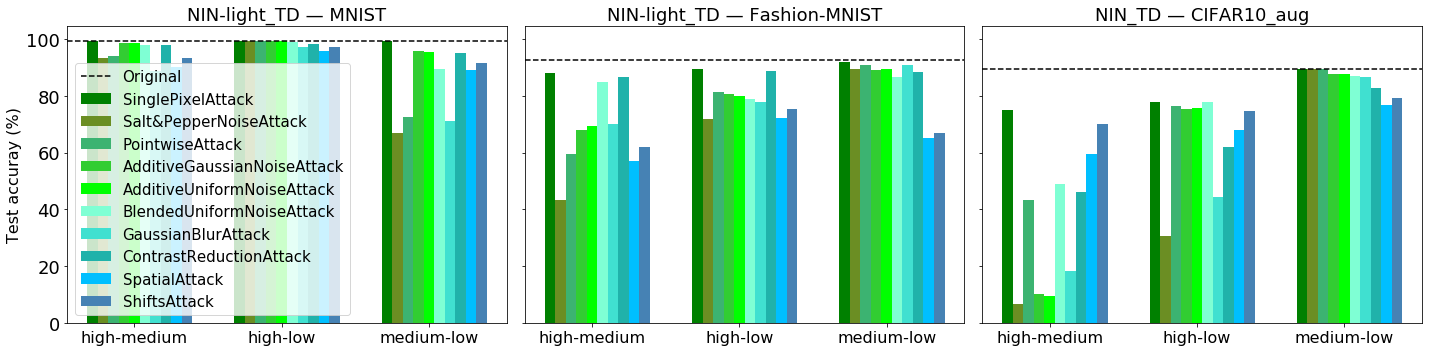

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharex=True, sharey=True)
n = len(attacks)
width = 1
sep = 14*width
xticks = np.arange(n)*sep
color = ['g', 'olivedrab', 'mediumseagreen', 'limegreen', 'lime', 'aquamarine', 'turquoise', 'lightseagreen', 'deepskyblue', 'steelblue']
xticks = np.arange(10)

attacks = ['SinglePixelAttack', 'S&P', 'PointwiseAttack', 'AdditiveGaussianNoiseAttack', 'AdditiveUniformNoiseAttack',
          'BlendedUniformNoiseAttack', 'GaussianBlurAttack', 'ContrastReductionAttack', 'SpatialAttack', 'ShiftsAttack']

datasets = ['MNIST', 'Fashion-MNIST', 'CIFAR10_aug']
models = ['NIN-light_TD', 'NIN-light_TD', 'NIN_TD']
for i, d in zip(range(3), datasets):
    ax[i].axhline(100 * dict_acc[d][models[i]][attacks[0]][0], linestyle='--', color='black', label='Original')
    for j,a in zip(range(len(attacks)), attacks):
        if a == 'S&P':
            ax[i].bar(xticks[j], 100 * dict_acc[d][models[i]][a][5], width=width, color=color[j], label='Salt&PepperNoiseAttack')
        else:
            ax[i].bar(xticks[j], 100 * dict_acc[d][models[i]][a][5], width=width, color=color[j], label=a)
        ax[i].bar(xticks[j] + sep, 100 * dict_acc[d][models[i]][a][6], width=width, color=color[j])
        ax[i].bar(xticks[j] + 2*sep, 100 * dict_acc[d][models[i]][a][7], width=width, color=color[j])
        
        ax[i].set_xticks([4, 18, 32])
        ax[i].set_title(d, fontsize=font_title)
        ax[i].set_xticklabels(['high-medium', 'high-low', 'medium-low'], fontsize=font_xlabel)
ax[0].set_ylabel("Test accuray (%)", fontsize=font_ylabel)
ax[0].legend(fontsize=font_legend)
ax[0].set_title(f"{models[0]} \u2014 MNIST", fontsize=font_title)
ax[1].set_title(f"{models[1]} \u2014 Fashion-MNIST", fontsize=font_title)
ax[2].set_title(f"{models[2]} \u2014 CIFAR10_aug", fontsize=font_title)

fig.tight_layout()